<Figure size 864x1152 with 0 Axes>

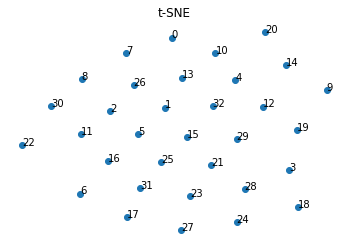

[   2.8553038   -2.7459846  -50.124054   103.581116    57.550987
  -25.689735   -75.65619    -36.173477   -74.40189    136.09882
   40.555855   -74.79011     81.219154    11.894298   101.05739
   16.436453   -51.466125   -35.759346   111.295876   110.2525
   83.10378     36.781654  -125.11358     18.762949    58.78515
   -5.782684   -29.7157      11.191816    65.55175     58.81074
 -100.72523    -24.028248    38.130707 ]
[10 19 20  4 15 21 13 29 30 25  5 11 33 22 24 16 14 28  1  2 26 32  6 27
 18  8  3 17  9 12  7 31 23]


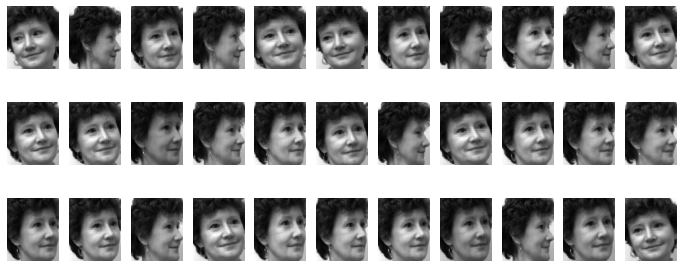

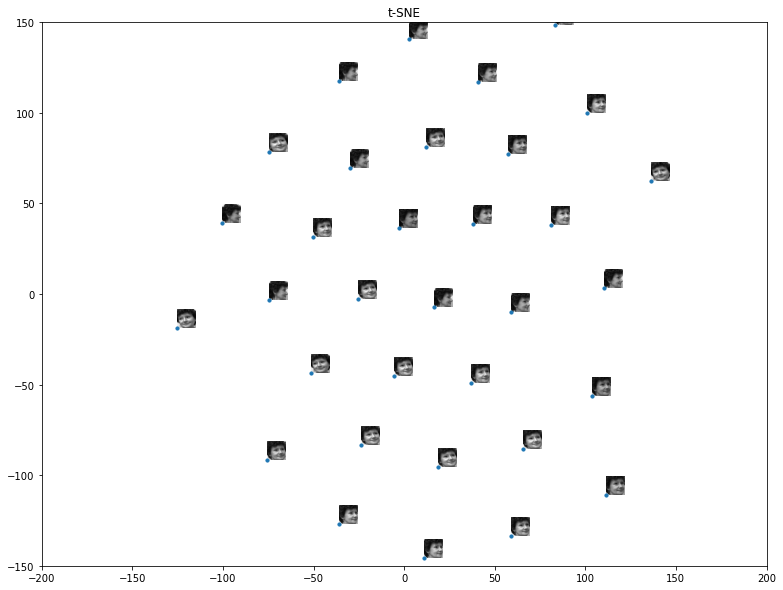

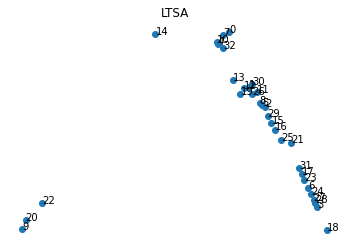

[-0.03347179  0.01035937  0.04808072  0.16436904 -0.05911184  0.04089429
  0.14464409 -0.04708498  0.03518084 -0.5006576  -0.06095041  0.02870807
 -0.00056256 -0.02454497 -0.20029107  0.06174635  0.07051314  0.13059741
  0.18672444 -0.00825656 -0.49330357  0.10692751 -0.4564351   0.13623028
  0.1510542   0.08409093  0.01887018  0.15728816  0.15969309  0.05323879
  0.01822989  0.12492977 -0.04770012]
[10 21 23 15 11  5 33  8  1 14 20 13  2 31 27 12  9  6  3 30 16 17 26 22
 32 18 24  7 25 28 29  4 19]


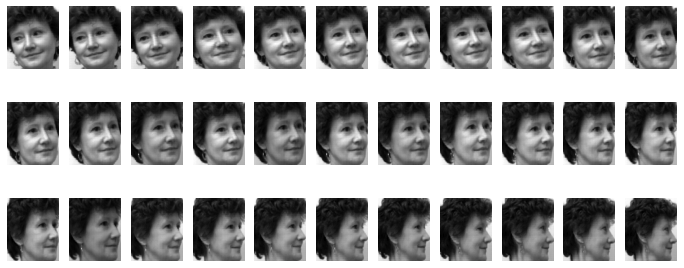

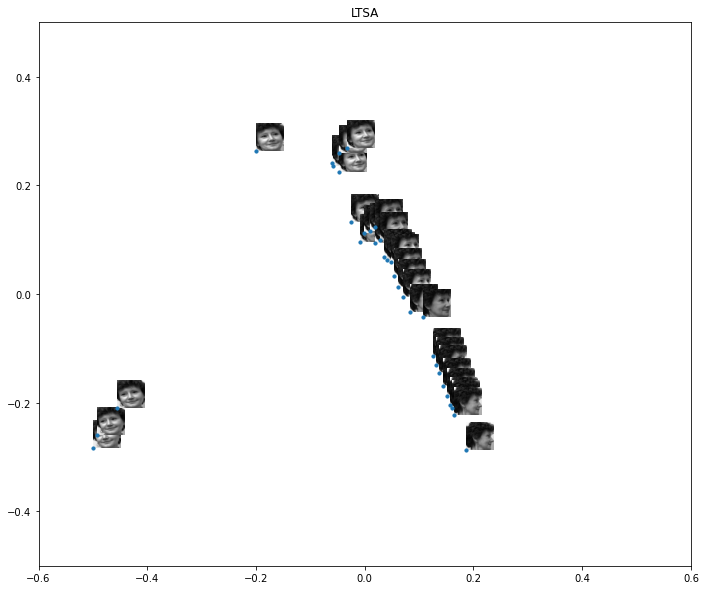

In [1]:
from time import time
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn import (manifold, datasets)

import numpy as np
import scipy.io as scio
######################################################################################
##### pre-process datasets #####
dataFile = 'face.mat'
data = scio.loadmat(dataFile)
raw_data = data['Y']
Image = raw_data.reshape(-1, 33).transpose(1, 0).astype(np.float)
ground_truth = np.array([10,21,23,15,11,5,8,33,1,14,20,13,2,27,31,12,9,6,3,30,16,17,26,22,32,18,24,7,25,28,29,4,19])
fig = plt.figure(figsize=[12,16])

##### TSNE #####
t_SNE = manifold.TSNE(n_components=2)
ev = t_SNE.fit_transform(Image)
n = np.arange(33)
fig,ax = plt.subplots()
ax.scatter(ev[: , 0], ev[: , 1])
plt.axis('off')
plt.title('t-SNE')
for i,txt in enumerate(n):
    ax.annotate(txt, (ev[i,0],ev[i,1]))
plt.show()

rank = ev[: , 0].argsort()
rank = rank[:: -1]
ev_sort = ev[np.argsort(ev[:,0])]
print(ev[: , 0])
print(rank + 1)
plt.figure(figsize=[12,5])
for i in range(33):
    plt.subplot(3, 11, i + 1)
    plt.imshow(raw_data[:, :, rank[i]], cmap='gray')
    plt.axis('off')
plt.show()

plt.figure(figsize = (20,10))
plt.plot()
ax = plt.gca()
ax.set_ylim(-150, 150)
ax.set_xlim(-200, 200)

imgplot = [None] * 33
for i in range(33):
    tx, ty = ev_sort[i,:]
    ax.imshow(raw_data[:, :, rank[i]], aspect='equal',extent=(tx, tx + 10, ty, ty + 10),cmap="gray")
ax.scatter(ev[:, 0], ev[:, 1],s=10)
plt.title('t-SNE')
plt.show()


##### LTSA #####
ltsa = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='ltsa')
ev = ltsa.fit_transform(Image)
n = np.arange(33)
fig,ax = plt.subplots()
ax.scatter(ev[: , 0],ev[: , 1])
plt.axis('off')
plt.title('LTSA')
for i,txt in enumerate(n):
    ax.annotate(txt, (ev[i,0],ev[i,1]))
plt.show()

rank = ev[: , 0].argsort()
#rank = rank[:: -1]
ev_sort = ev[np.argsort(ev[:,0])]
print(ev[: , 0])
print(rank + 1)
plt.figure(figsize=[12,5])
for i in range(33):
    plt.subplot(3, 11, i + 1)
    plt.imshow(raw_data[: , : , rank[i]], cmap='gray')
    plt.axis('off')
plt.show()

plt.figure(figsize = (20,10))
plt.plot()
ax = plt.gca()
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-0.6, 0.6)

imgplot = [None] * 33
for i in range(33):
    tx, ty = ev_sort[i,:]
    ax.imshow(raw_data[:, :, rank[i]], aspect='equal',extent=(tx, tx + 0.05, ty, ty + 0.05),cmap="gray")
ax.scatter(ev[:, 0], ev[:, 1],s=10)
plt.title('LTSA')
plt.show()